In [12]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import exp, cos
from scipy.optimize import curve_fit

import pandas as pd

(0.0, 2.0)

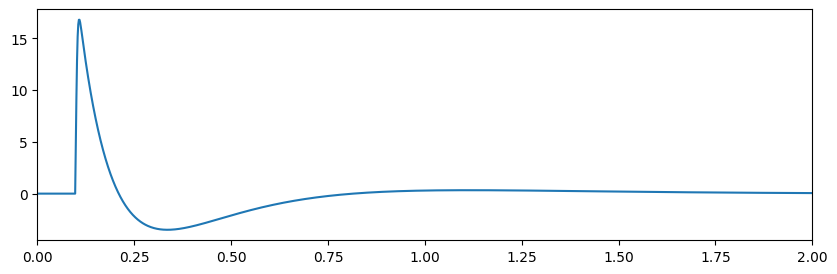

In [13]:
# Cargar datos desde el archivo CSV
df1 = pd.read_csv('cold.csv')
df2 = pd.read_csv('time.csv')

# Convertir DataFrame a NumPy array
data = df1.to_numpy()*10000
time = df2.to_numpy()*100000

# Mostrar los datos cargados
plt.figure(figsize=(10,3))
plt.plot(time, data)
plt.xlim([0,2])



In [14]:
def pulse(t, C1, C2, a1, a2, d):
    return (- C1 * np.exp(-a1 * (t - d)) + C2 * np.exp(-a2 * (t - d)) * np.cos(a2 * (t - d)))*np.heaviside(t - d,0.5)

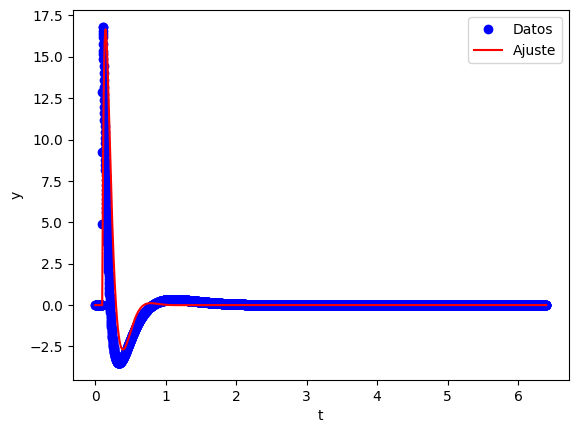

In [47]:

# Generar algunos datos de prueba para asegurar el funcionamiento (puedes omitir si usas datos reales)

r_data = np.array(data[0:4000]).flatten()
r_time = np.array(time[0:4000]).flatten()

t_data = r_time
y_data = pulse(t_data, 40, 40, 32, 8, 0.1) 

# Graficar los datos originales y el ajuste
plt.figure()
plt.plot(r_time, r_data, 'bo', label='Datos')
plt.plot(t_data, y_data, 'r-', label='Ajuste')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

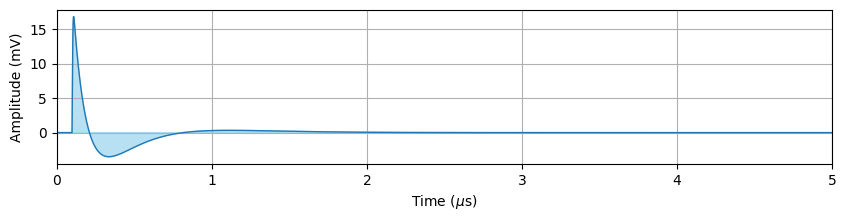

In [49]:
# --- Cargar el vector desde el archivo CSV ---

# Graficar línea con área sombreada
plt.figure(figsize=(10, 2.0))
plt.plot(r_time, r_data, color='tab:blue', linewidth=1.0, label='Datos')
# plt.plot(t_data, y_data, 'r-', label='Ajuste')
plt.fill_between(r_time, r_data, color='skyblue', alpha=0.6)

# Configurar la leyenda y las etiquetas de los ejes
plt.ylabel('Amplitude (mV)')
plt.xlabel('Time ($\mu$s)')
plt.xlim([0, 5])
plt.grid(True)

# Mostrar el gráfico
# plt.show()

# plt.savefig("output/SimuHistogram.pdf", format="pdf", bbox_inches="tight")



Parámetros óptimos: [45.88824129 39.26729521 31.50455213  8.07935599  0.09542097  0.12226693]


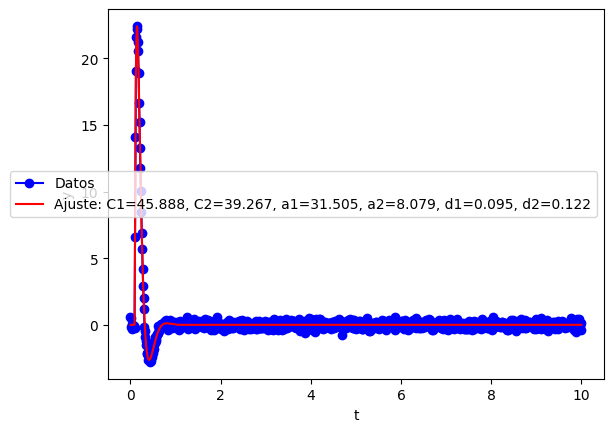

In [5]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Definir la función pulse
def pulse(t, C1, C2, a1, a2, d1, d2):
    return (- C1 * np.exp(-a1 * (t - d1)) + C2 * np.exp(-a2 * (t - d2)) * np.cos(a2 * (t - d2)))*np.heaviside(t - d1,0.5)

# Generar algunos datos de prueba para asegurar el funcionamiento (puedes omitir si usas datos reales)
t_data = np.linspace(0, 10, 1000)
y_data = pulse(t_data, 40, 40, 32, 8, 0.1, 0.12) + 0.2 * np.random.normal(size=t_data.size)

# Ajustar la función pulse a los datos
try:
    popt, pcov = curve_fit(pulse, t_data, y_data, p0=[55, 65, 14, 7, 0.1, 0.1])
    print("Parámetros óptimos:", popt)
except Exception as e:
    print("Error durante el ajuste:", str(e))

# Generar datos usando la función ajustada
y_fit = pulse(t_data, *popt)

# Graficar los datos originales y el ajuste
plt.figure()
plt.plot(t_data, y_data, 'b-o', label='Datos')
plt.plot(t_data, y_fit, 'r-', label='Ajuste: C1=%.3f, C2=%.3f, a1=%.3f, a2=%.3f, d1=%.3f, d2=%.3f' % tuple(popt))
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()


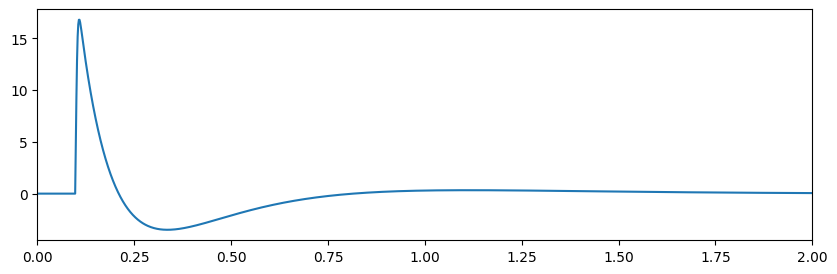

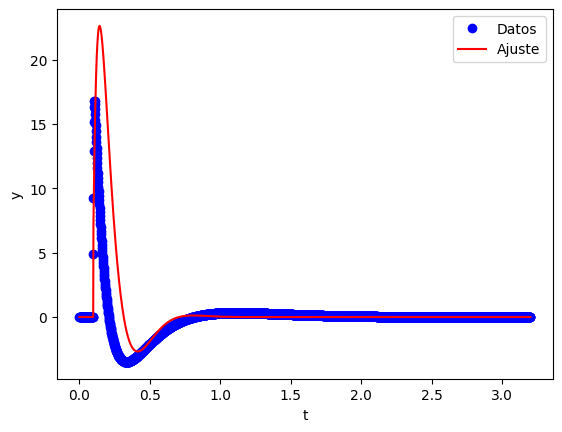

In [6]:

# Cargar datos desde el archivo CSV
df1 = pd.read_csv('cold.csv')
df2 = pd.read_csv('time.csv')

# Convertir DataFrame a NumPy array
data = df1.to_numpy()*10000
time = df2.to_numpy()*100000

# Mostrar los datos cargados
plt.figure(figsize=(10,3))
plt.plot(time, data)
plt.xlim([0,2])


# Generar algunos datos de prueba para asegurar el funcionamiento (puedes omitir si usas datos reales)

r_data = data[0:2000]
r_time = time[0:2000]

t_data = r_time
y_data = pulse(t_data, 40, 40, 32, 8, 0.1, 0.12) 

# Graficar los datos originales y el ajuste
plt.figure()
plt.plot(r_time, r_data, 'bo', label='Datos')
plt.plot(t_data, y_data, 'r-', label='Ajuste')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

# Parametros de la transformada Z

In [7]:
T = 1.5E-3
A1 = -40
A2 = 40
a1 = 32
a2 = 8
b1 = 8


a = cos(b1*T)
b = exp(-a2*T)
c = exp(-2*a2*T)
d = exp(-a1*T)



C1 = 1
C2 = -2*a*b - d + A2*2*a*b + A2 -A2*a*b - A2 - A2*d
C3 = c + 2*a*b*d - A2*c - 2*A2*a*b + A2*a*b + A2*a*b*d + A2*d
C4 = -d*c + A2*c - A2*a*b*d


D1 = 1
D2 = -2*a*b - d - 1
D3 = c + 2*a*b*d + 2*a*b + d
D4 = -c*d - c - 2*a*b*d
D5 = c*d

print(C1)
print(C2)
print(C3)
print(C4)

print(D1)
print(D2)
print(D3)
print(D4)
print(D5)

1
-1.5344635131905022
0.08144844921341132
0.4530284004447225
1
-3.929134932182093
5.788814096643025
-3.7902100602721376
0.9305308958112057


In [ ]:
t = np.zeros(4096)

t[62] = 1
t[2000] = 2
t[2700] = 1

tm = np.arange(0,4096*100E-6,100E-6)


x = t
y = np.zeros(4096)

for i in range(6,4096):

    den = y[i-1]*D2 + y[i-2]*D3 + y[i-3]*D4 + y[i-4]*D5
    num = x[i]*C1 + x[i-1]*(C2-C1) + x[i-2]*(C3-C2) + x[i-3]*(C4-C3) + x[i-4]*(-C4)
    
    y[i] = (num - den)/D1
    



plt.plot(tm,y)

In [8]:
factor = 2**31

C_1 = np.round(factor*C1)
C_2 = np.round(factor*C2)
C_3 = np.round(factor*C3)
C_4 = np.round(factor*C4)

D_1 = np.round(factor*D1)
D_2 = np.round(factor*D2)
D_3 = np.round(factor*D3)
D_4 = np.round(factor*D4)
D_5 = np.round(factor*D5)

print(C_1)
print(C_2)
print(C_3)
print(C_4)

print(D_1)
print(D_2)
print(D_3)
print(D_4)
print(D_5)

2147483648
-3295235303.0
174909213.0
972871082.0
2147483648
-8437753018.0
12431383614.0
-8139414127.0
1998299883.0


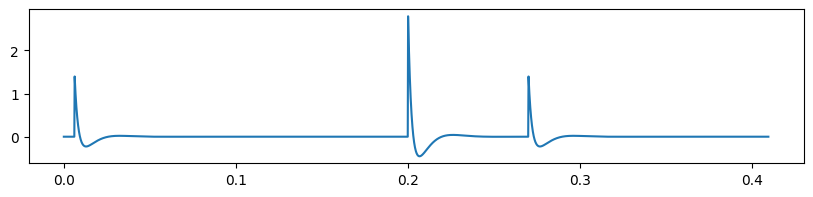

In [9]:
t = np.zeros(4096)

t[62] = 1
t[2000] = 2
t[2700] = 1

tm = np.arange(0,4096*100E-6,100E-6)


x = t
y = np.zeros(4096)
nums = np.zeros(4096)
dens = np.zeros(4096)

for i in range(6,4096):

    den = y[i-1]*D_2 + y[i-2]*D_3 + y[i-3]*D_4 + y[i-4]*D_5
    num = x[i]*C_1 + x[i-1]*(C_2-C_1) + x[i-2]*(C_3-C_2) + x[i-3]*(C_4-C_3) + x[i-4]*(-C_4)

    nums[i] = num
    dens[i] = den
    
    y[i] = (num - den)/factor
    


plt.figure(figsize=(10,2))
plt.plot(tm,y)